In [1]:
import pandas as pd

In [2]:
# Replacing path with own file path 
file_path = "owid-covid-data.csv"
df = pd.read_csv(file_path)

In [3]:
# Checking all column names
print("🧾 Columns in the dataset:")
print(df.columns)

🧾 Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', '

In [4]:
# Previewing the first 5 rows
print("\n👀 Preview of the dataset:")
print(df.head())


👀 Preview of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1

In [5]:
# checking for missing values 
print("\n🚨 Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


🚨 Missing values per column:
weekly_icu_admissions_per_million        90196
weekly_icu_admissions                    90196
weekly_hosp_admissions_per_million       89580
weekly_hosp_admissions                   89580
people_fully_vaccinated_per_hundred      82259
people_fully_vaccinated                  82259
icu_patients                             81850
icu_patients_per_million                 81850
new_vaccinations                         80842
people_vaccinated_per_hundred            79673
people_vaccinated                        79673
hosp_patients_per_million                79611
hosp_patients                            79611
total_vaccinations                       78920
total_vaccinations_per_hundred           78920
new_vaccinations_smoothed                70489
new_vaccinations_smoothed_per_million    70489
total_tests                              50153
total_tests_per_thousand                 50153
new_tests_per_thousand                   49840
new_tests                     

In [14]:
# filter to country intersts
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

In [16]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [17]:
# Droping rows where date, location, or total_cases are missing
df = df.dropna(subset=['date', 'location', 'total_cases'])

In [20]:
# Filling some with 0 (e.g., new cases), others interpolate for smoother plots
fill_zero_cols = ['new_cases', 'new_deaths']
interpolate_cols = ['total_cases', 'total_deaths', 'total_vaccinations']

In [19]:
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

In [22]:
print("🎯 Cleaned dataset preview:")
print(df.head())

🎯 Cleaned dataset preview:
  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.98

In [23]:
# import needed libraries
import matplotlib.pyplot as plt


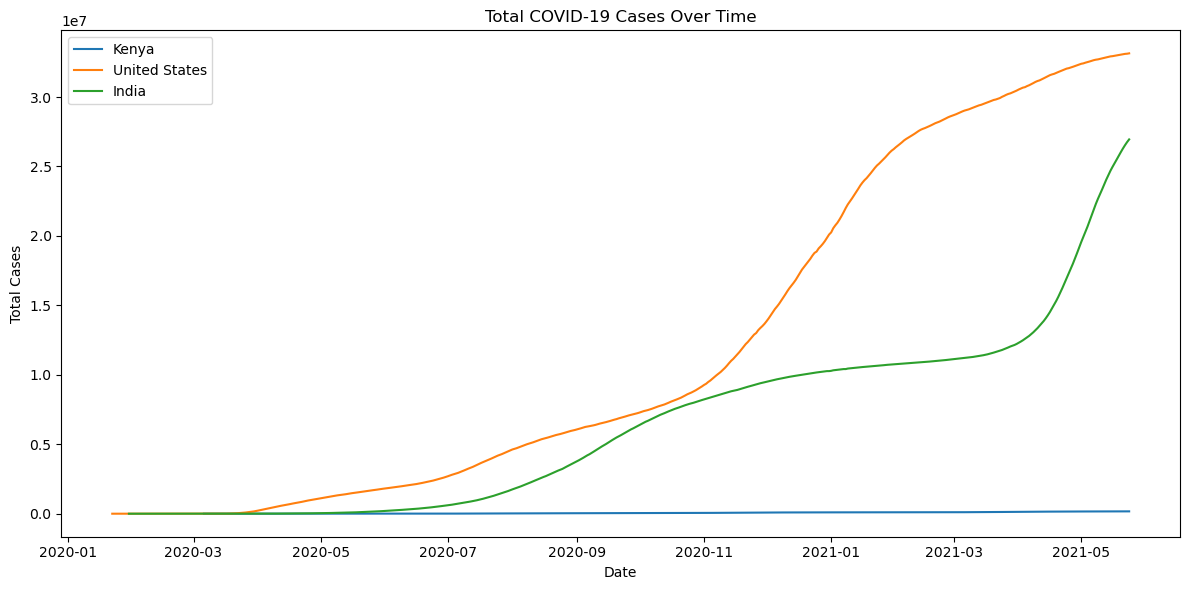

In [27]:
# plot covid-19 cases over time in the three different countries 
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

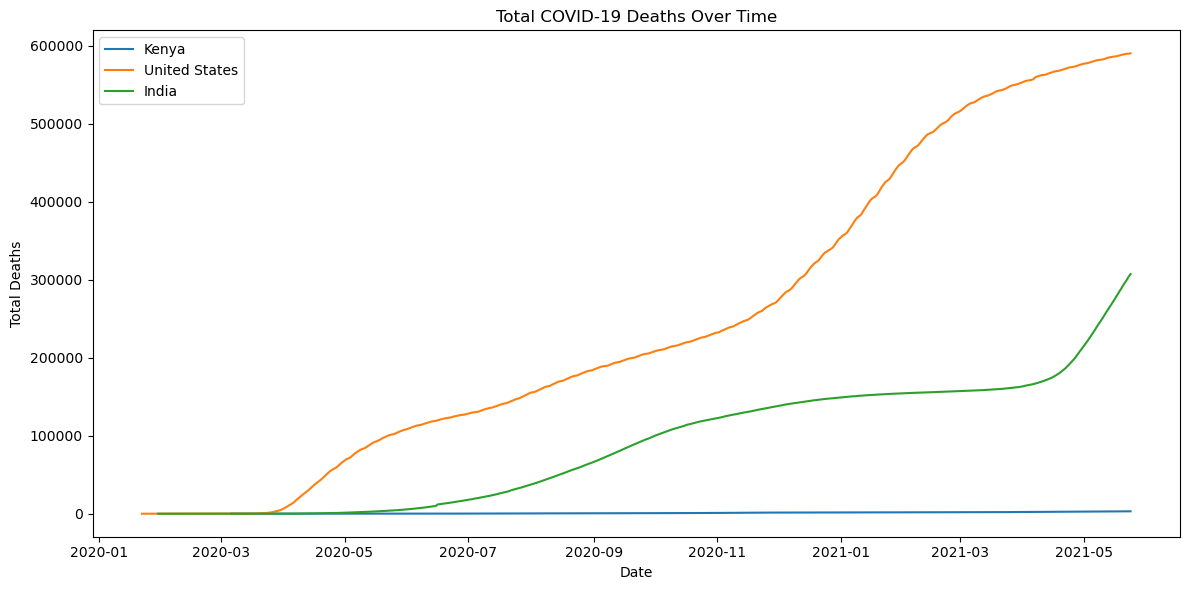

In [28]:
# Ploting Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

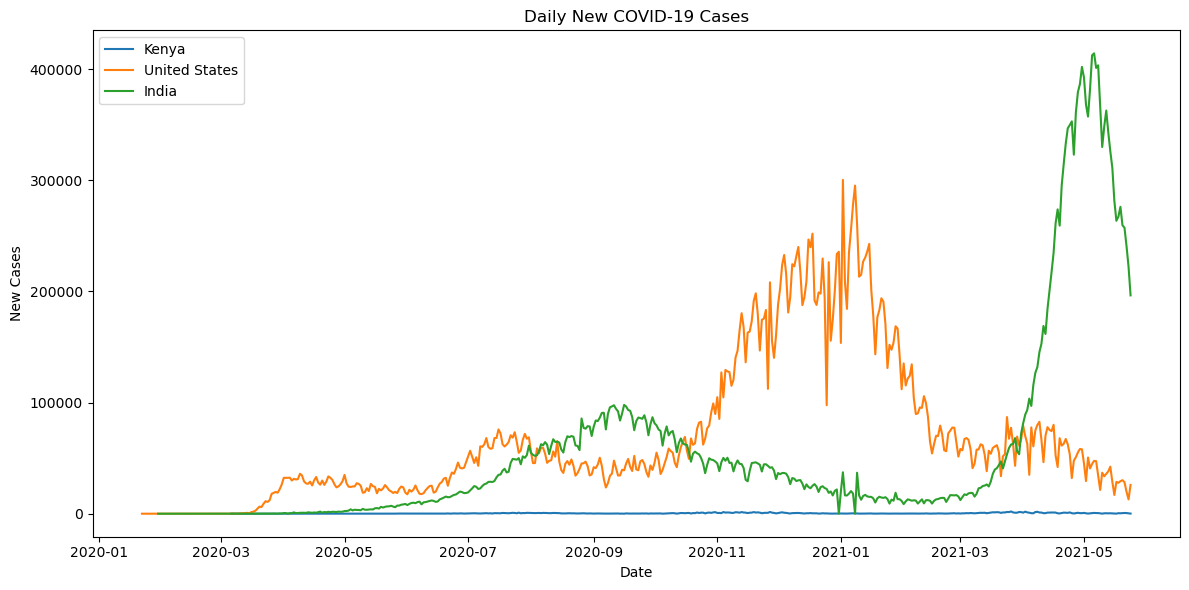

In [29]:
# Comparing Daily New Cases
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


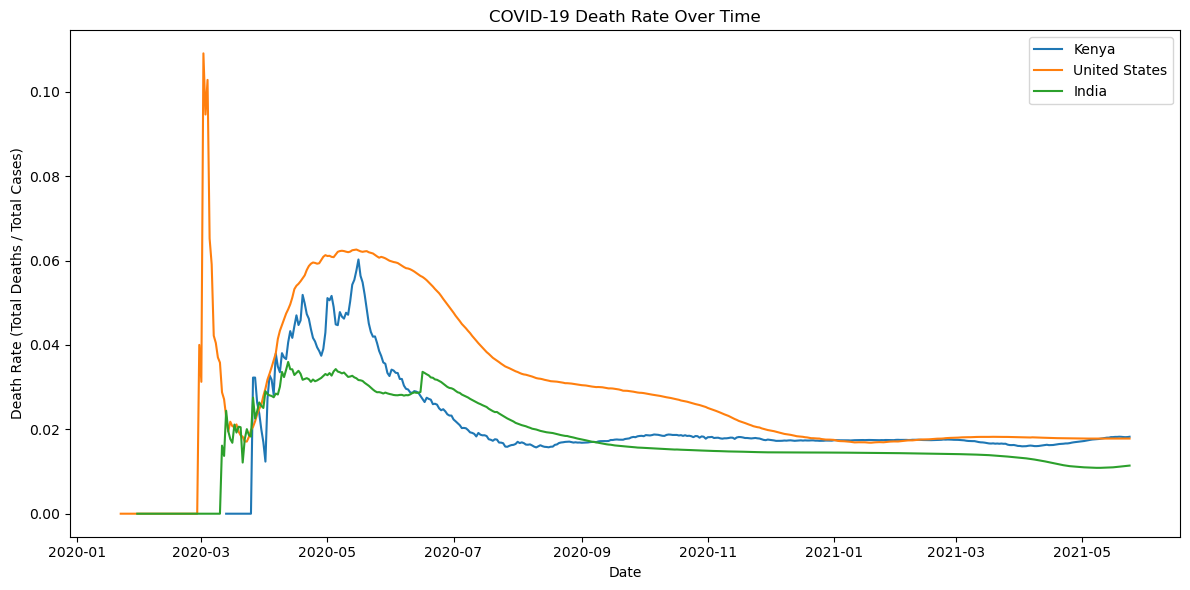

In [30]:
# Calculating and Ploting Death Rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Total Deaths / Total Cases)")
plt.legend()
plt.tight_layout()
plt.show()

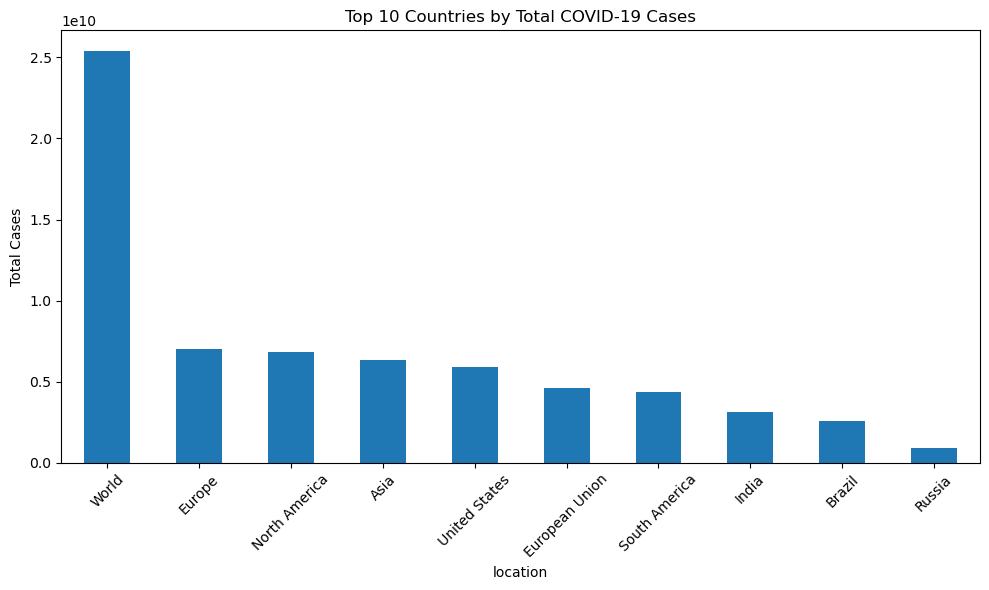

In [34]:
# Bar Chart - Top Countries by Total Cases (Latest Date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_countries = df.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot.bar()
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

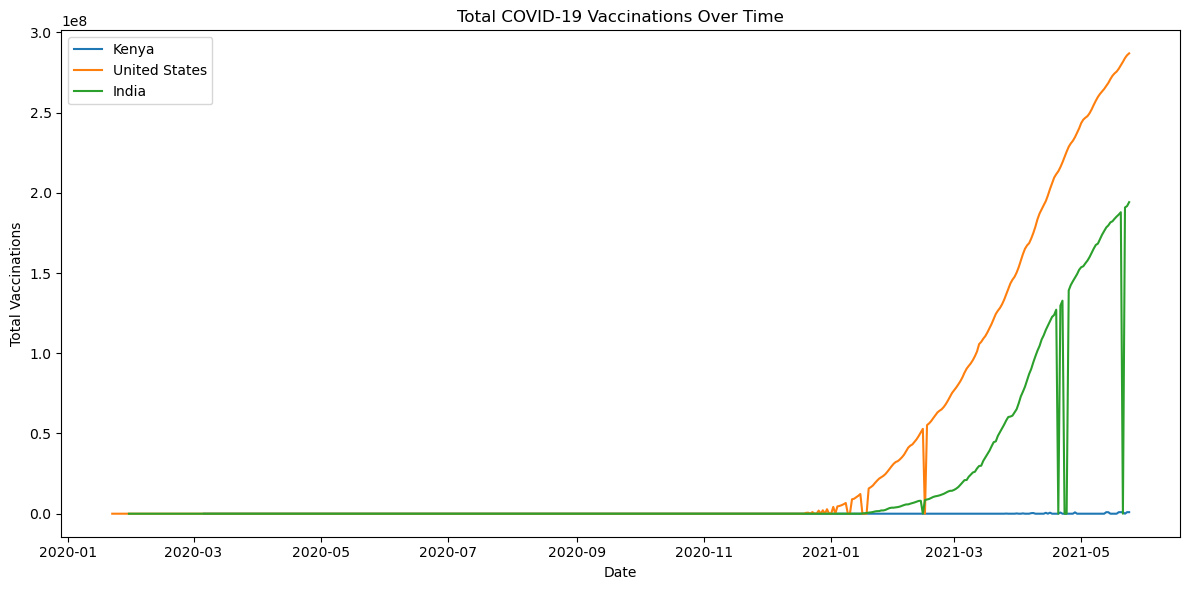

In [35]:
# Line Chart – Total Vaccinations Over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Compare % of Vaccinated Population (Latest Date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]


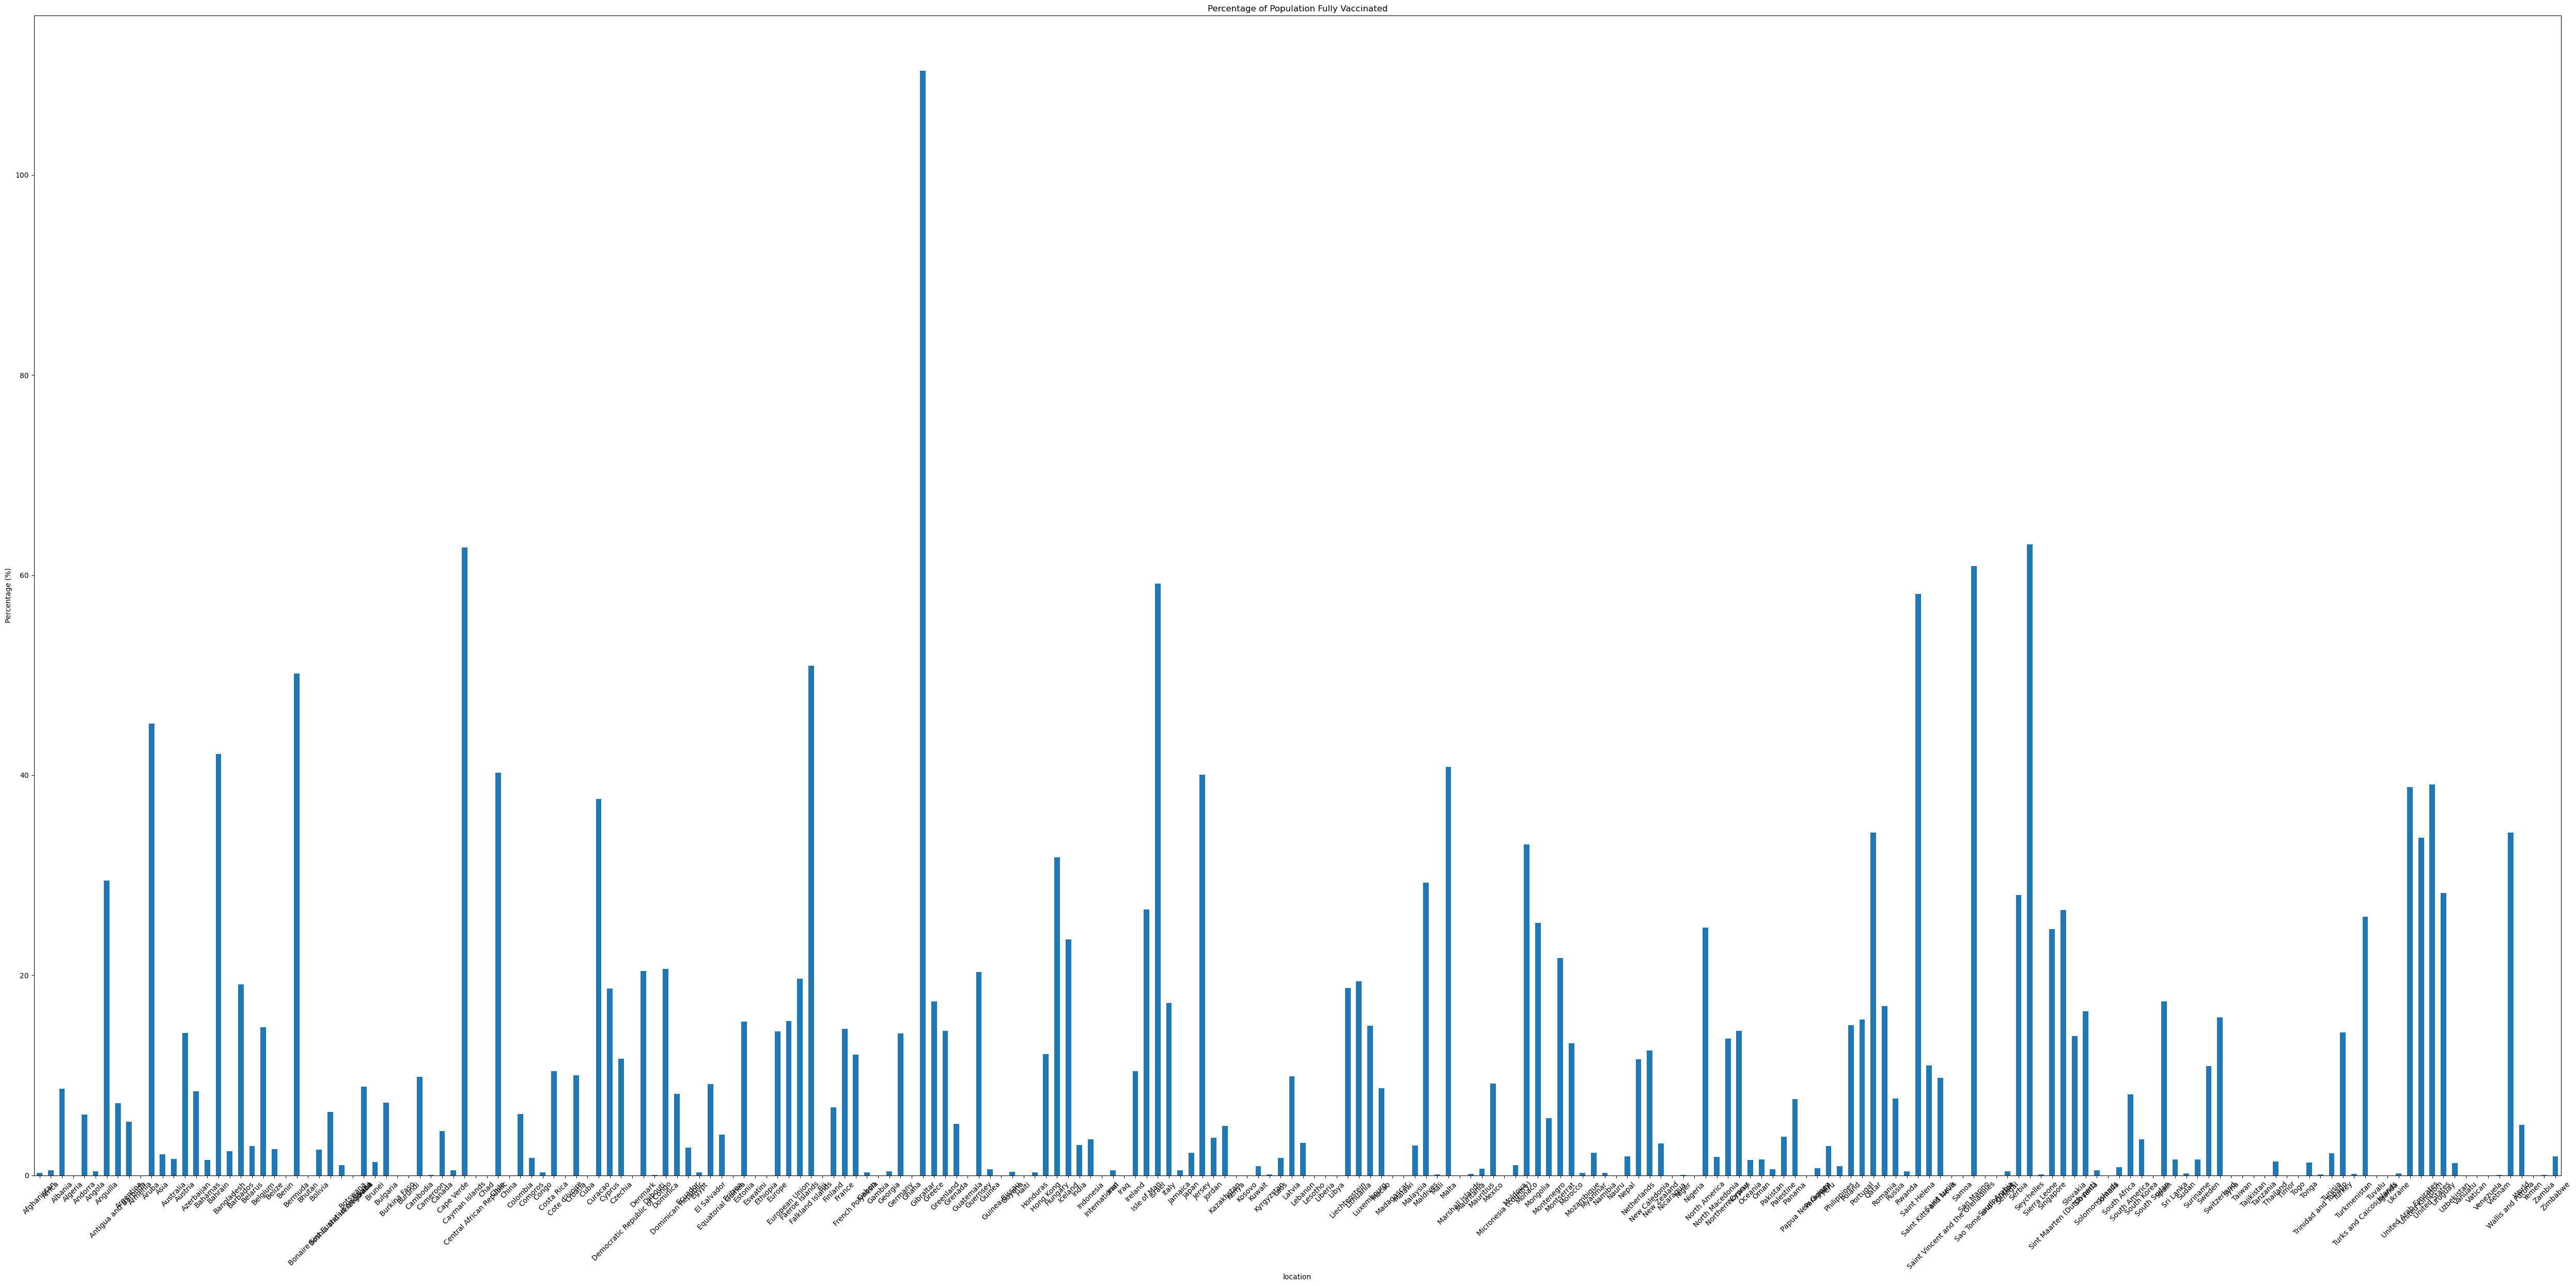

In [47]:
# We'll use 'people_fully_vaccinated_per_hundred' if available
if 'people_fully_vaccinated_per_hundred' in df.columns:
    percent_data = df.groupby('location')['people_fully_vaccinated_per_hundred'].max()
else:
    # fallback if missing: estimate percentage using total_vaccinations / population
    df = df.dropna(subset=['total_vaccinations', 'population'])
    top_countries = (df['total_vaccinations'] / df['population']) * 100
    top_countries = df['location']

plt.figure(figsize=(50, 25))
percent_data.plot.bar()
plt.title("Percentage of Population Fully Vaccinated")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Pie Chart – Vaccinated vs Unvaccinated (Pick One Country)
country_name = 'India'
country_latest = df[(df['location'] == country_name) & (df['date'] == df['date'].max())]

if not country_latest.empty and 'people_fully_vaccinated' in country_latest.columns:
    vaccinated = country_latest['people_fully_vaccinated'].values[0]
    population = country_latest['population'].values[0]
    
    if pd.notna(vaccinated) and pd.notna(population):
        unvaccinated = population - vaccinated
        labels = ['Vaccinated', 'Unvaccinated']
        values = [vaccinated, unvaccinated]
        
        plt.figure(figsize=(6, 6))
        plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'lightgray'])
        plt.title(f"{country_name} – Vaccinated vs Unvaccinated Population")
        plt.show()

Insight on the above data 

the United States had the fastest and highest vaccine rollout;
The U.S. led all three countries (USA, India, Kenya) in total vaccinations and percentage of population fully vaccinated. By mid-2021, over 50% of its population had received full vaccination coverage.

India experienced the highest daily new case peaks;
India’s second wave in mid-2021 showed sharp spikes in new cases, far surpassing those of Kenya and even the U.S. This indicates widespread transmission despite increasing vaccination efforts.

Kenya had relatively low total cases and deaths, but also low vaccination rates;
Kenya’s case and death counts remained modest compared to India and the U.S., but its vaccine rollout was significantly slower, with under 20% of the population fully vaccinated by the latest date.

Death rates decreased over time as vaccination rates increased;
Across all countries, the death rate (total deaths / total cases) trended downward, likely due to better treatments and expanded vaccine coverage—especially visible in the U.S.

Anomalies and data gaps observed;The 
Sudden jumps in case numbers suggest possible data backlogs (especially in India).
Missing values in vaccination data were prevalent in earlier months for Kenya.

